# Signal processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import os
import scipy
import scipy.signal as signal


In [3]:
data_path = "..\\Inteferometer\\2024_08_28"

file_list = os.listdir(data_path)
number_file = len(file_list)

file_list

['2024_08_28_10_50_01_4_PSD.csv',
 '2024_08_28_10_50_06_1_PSD.csv',
 '2024_08_28_10_50_10_7_PSD.csv',
 '2024_08_28_10_50_15_4_PSD.csv',
 '2024_08_28_10_50_20_0_PSD.csv',
 '2024_08_28_10_50_24_7_PSD.csv',
 '2024_08_28_10_50_29_3_PSD.csv',
 '2024_08_28_10_50_34_0_PSD.csv',
 '2024_08_28_10_50_38_6_PSD.csv',
 '2024_08_28_10_50_43_3_PSD.csv',
 '2024_08_28_10_50_47_9_PSD.csv',
 '2024_08_28_10_50_52_6_PSD.csv',
 '2024_08_28_10_50_57_2_PSD.csv',
 '2024_08_28_10_51_01_8_PSD.csv',
 '2024_08_28_10_51_06_4_PSD.csv',
 '2024_08_28_10_51_11_1_PSD.csv',
 '2024_08_28_10_51_15_7_PSD.csv',
 '2024_08_28_10_51_20_4_PSD.csv',
 '2024_08_28_10_51_25_0_PSD.csv',
 '2024_08_28_10_51_29_7_PSD.csv',
 '2024_08_28_10_51_34_3_PSD.csv',
 '2024_08_28_10_51_39_0_PSD.csv',
 '2024_08_28_10_51_43_6_PSD.csv',
 '2024_08_28_10_51_48_3_PSD.csv',
 '2024_08_28_10_51_52_9_PSD.csv',
 '2024_08_28_10_51_57_6_PSD.csv',
 '2024_08_28_10_52_02_1_PSD.csv',
 '2024_08_28_10_52_06_8_PSD.csv',
 '2024_08_28_10_52_11_4_PSD.csv',
 '2024_08_28_1

In [29]:
Frequency =  np.loadtxt(os.path.join(data_path, file_list[0]), delimiter=',')[:,0]

print(Frequency)

[621.4    621.4023 621.4047 621.407  621.4094 621.4117 621.4141 621.4164
 621.4188 621.4211 621.4234 621.4258 621.4281 621.4305 621.4328 621.4352
 621.4375 621.4398 621.4422 621.4445 621.4469 621.4492 621.4516 621.4539
 621.4562 621.4586 621.4609 621.4633 621.4656 621.468  621.4703 621.4727
 621.475  621.4773 621.4797 621.482  621.4844 621.4867 621.4891 621.4914
 621.4938 621.4961 621.4984 621.5008 621.5031 621.5055 621.5078 621.5102
 621.5125 621.5148 621.5172 621.5195 621.5219 621.5242 621.5266 621.5289
 621.5312 621.5336 621.5359 621.5383 621.5406 621.543  621.5453 621.5477
 621.55   621.5523 621.5547 621.557  621.5594 621.5617 621.5641 621.5664
 621.5688 621.5711 621.5734 621.5758 621.5781 621.5805 621.5828 621.5852
 621.5875 621.5898 621.5922 621.5945 621.5969 621.5992 621.6016 621.6039
 621.6062 621.6086 621.6109 621.6133 621.6156 621.618  621.6203 621.6227
 621.625  621.6273 621.6297 621.632  621.6344 621.6367 621.6391 621.6414
 621.6438 621.6461 621.6484 621.6508 621.6531 621.6

In [24]:
# Get time form name file
time_list = np.zeros(number_file)
time1_list = ["" for i in range(number_file)]

for file in file_list:
    # Split the string into its components
    components = file.split("_")
    # Extract the date and time components
    date_str = f"{components[0]}-{components[1]}-{components[2]}"
    time_str = f"{components[3]}:{components[4]}:{components[5]}"
    time1_list[file_list.index(file)] = time_str
    # Combine the date and time components into a single string
    dateTime_str = f"{date_str} {time_str}"
    
    # Parse the string into a datetime object
    dateTime = datetime.datetime.strptime(dateTime_str, '%Y-%m-%d %H:%M:%S')
    time_list[file_list.index(file)] = dateTime.timestamp()

In [30]:
power_list = np.zeros(number_file)
data_matrix = np.zeros((len(Frequency), number_file))

for file in file_list:
    data = np.loadtxt(os.path.join(data_path, file), delimiter=',')
    data_matrix[:, file_list.index(file)] = data[:, 1]
    power_list[file_list.index(file)] = data[:, 1].mean()

power_list

array([-3.55575039, -3.55111543, -3.54952597, ..., -3.52555117,
       -3.53149805, -3.53440098])

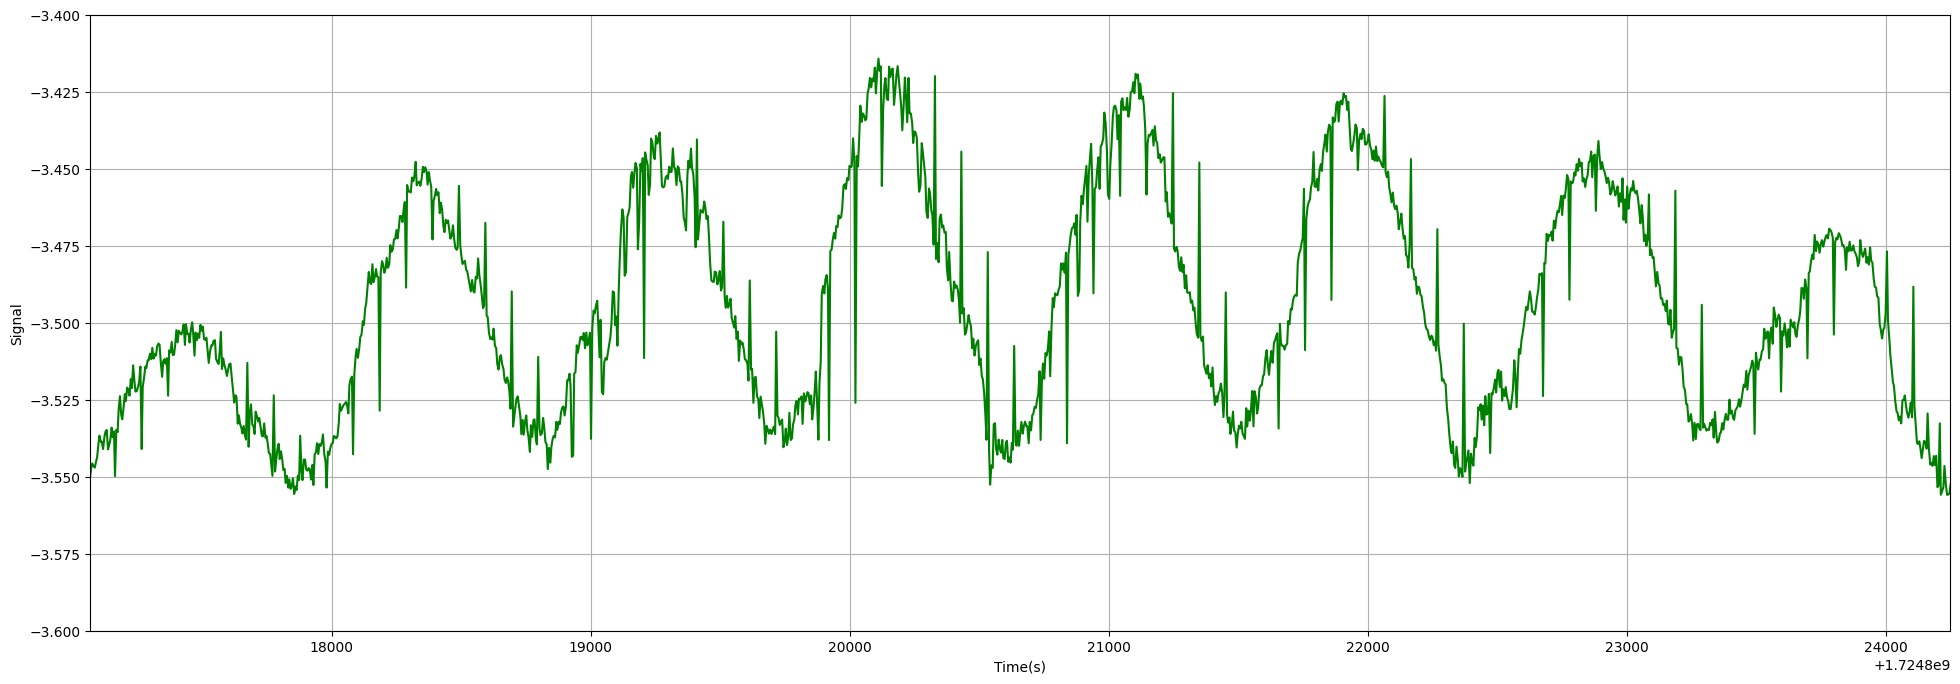

In [6]:
fig, ax = plt.subplots(1, 1, figsize = [24, 8])
ax.set(xlabel = 'Time(s)', ylabel = 'Signal')
ax.grid()
ax.plot(time_list, power_list, color = 'green', linestyle = '-')
ax.set_xlim(1724817068.0, 1724824250.0)
ax.set_ylim(-3.6, -3.4)
plt.show()

In [7]:
def remove_spike(x, threshold=3, window_size=11):
    """
    Remove spikes from the x-axis.

    Parameters:
    x (numpy array): The x-axis to remove spikes from.
    threshold (float): The threshold to define spikes. Default value is 3.
    window_size (int): The size of the window to calculate the average. Default value is 11.

    Returns:
    x_smooth (numpy array): The x-axis with spikes removed.
    """
    # Calculate the mean of x
    x_mean = np.mean(x)

    # Calculate the standard deviation of x
    x_std = np.std(x)

    # Finding the indices of spikes
    spike = np.abs(x - x_mean) > threshold * x_std

    # Removing the spike
    x_smooth = np.copy(x)
    x_smooth[spike] = np.mean(x[~spike])

    # Using linear interpolation
    # x_smooth[spike] = np.interp(np.where(spike)[0], np.where(~spike)[0], x[~spike])           # Bad

    # Using Savitzky-Golay filter
    # x_smooth = signal.savgol_filter(x_smooth, window_size, 3)                                 # Dependence on Threshold

    # Using convolution
    x_smooth = np.convolve(x, np.ones(window_size)/window_size, mode='same')                    # Good

    return x_smooth


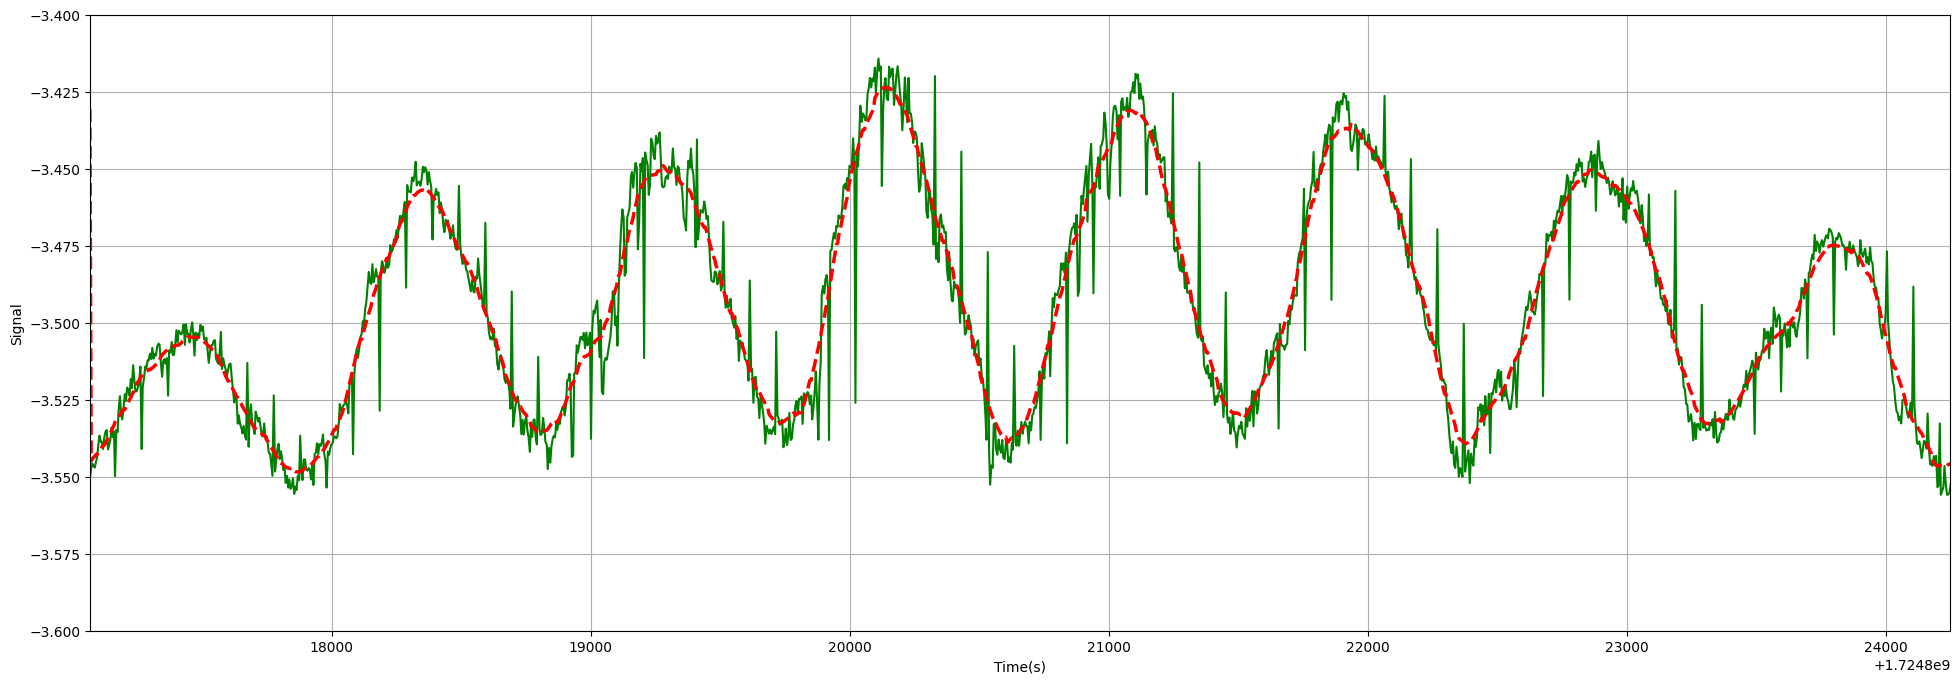

In [8]:
power_1 = remove_spike(power_list, threshold=3, window_size=31)

fig, ax_1 = plt.subplots(1, 1, figsize = [24, 8])
ax_1.set(xlabel = 'Time(s)', ylabel = 'Signal')
ax_1.plot(time_list, power_list, color = 'green', linestyle = '-')
ax_1.plot(time_list, power_1, color = 'red', linestyle = '--', linewidth = 2.5)
ax_1.set_xlim(1724817068.0, 1724824250.0)
ax_1.set_ylim(-3.6, -3.4)
ax_1.grid()
plt.show()


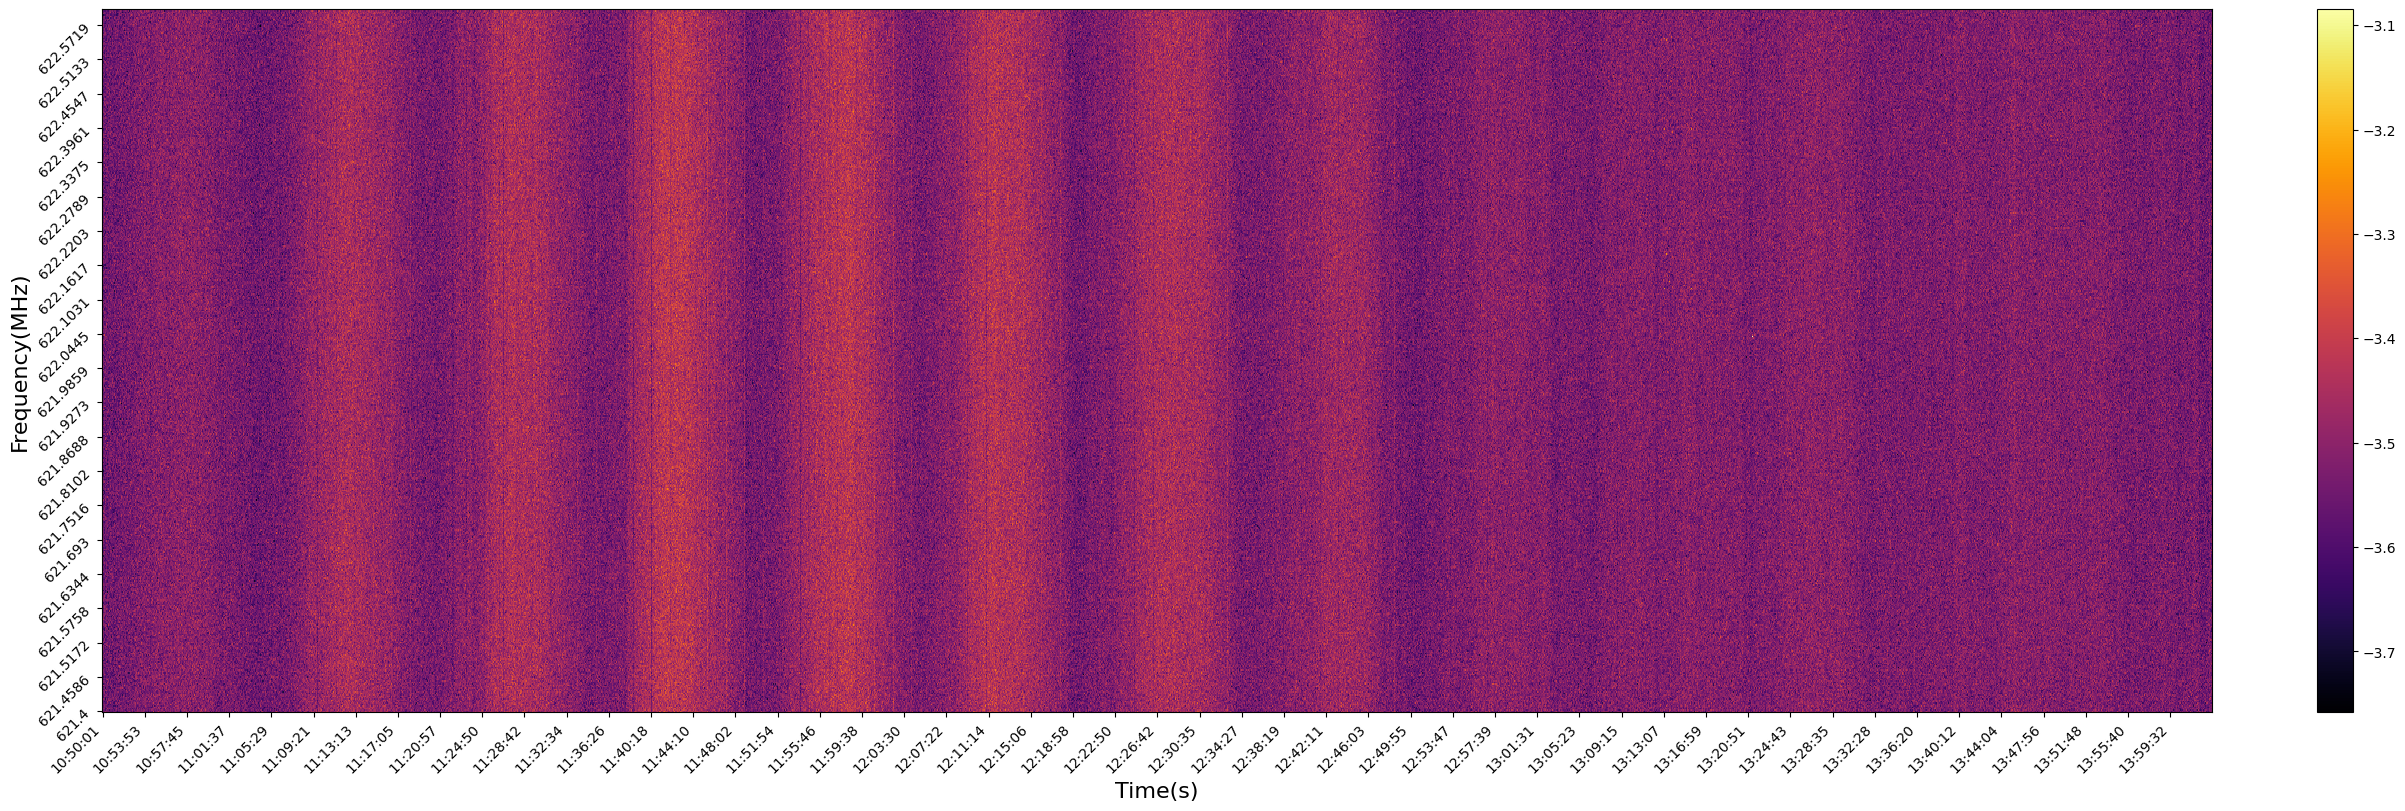

In [94]:
fig, ax_2 = plt.subplots(1, 1, figsize = [24, 8], layout = 'constrained')
ax_2.set_xlabel('Time(s)', fontsize=16)
ax_2.set_ylabel('Frequency(MHz)', fontsize=16)
plt.imshow(data_matrix, cmap = 'inferno', interpolation = 'nearest', aspect = 'auto', origin = 'lower')
x = np.arange(0, len(time1_list))
plt.xticks(x[::len(time1_list)//50], time1_list[::len(time1_list)//50], rotation=45, ha='right')
y = np.arange(0, 512)
plt.yticks(y[::len(Frequency)//20], Frequency[::len(Frequency)//20], rotation=45, ha='right')
plt.colorbar()
plt.show()